In [3]:
#pacages used in this notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#pacages from previous notebooks
# from matplotlib import ticker, axis
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.backends.backend_pdf import PdfPages
# from scipy import optimize
# from scipy import misc
# from scipy import stats

#plot style
plt.style.use("style.mplstyle")
#calculate chi-squared
def chi_squared_np(x, y, y_err, slope, intercept):
    chi2 = np.sum(np.square(y - slope*x-intercept) / np.square(y_err)) 
    return chi2

In [4]:
 #read the data
file = pd.read_csv(r'CL_RA.csv')
data = np.genfromtxt('CL_RA.csv')
#density thickness
z = data[7:,2]
#natural log of counts
lncts = data[7:,10]
#natural log of counts error
lncts_err = data[7:,11]
#index t equals to 60
t_60 = 18-7
#index t equals to 100
t_200 = 27-7
#index t equals to 300
t_300 = 31-7
#index t equals to 500
t_500 = 32-7

In [16]:
#ordinary least squares regression of all data
z_r_all = sm.add_constant(z)
ols_all = sm.OLS(lncts, z_r_all)
res_all = ols_all.fit()
res_all.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     51.18
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.76e-07
Time:                        21:57:21   Log-Likelihood:                 21.604
No. Observations:                  25   AIC:                            -39.21
Df Residuals:                      23   BIC:                            -36.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4311      0.026    208.668      0.000       5.377       5.485
x1         -6.514e-05    9.1e-06     -7.154      0.000    -8.4e-05   -4.63e-05
==============================================================================
Omnibus:                        0.229   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.392
Skew:                           0.177   Prob(JB):                        0.822
Kurtosis:                       2.499   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

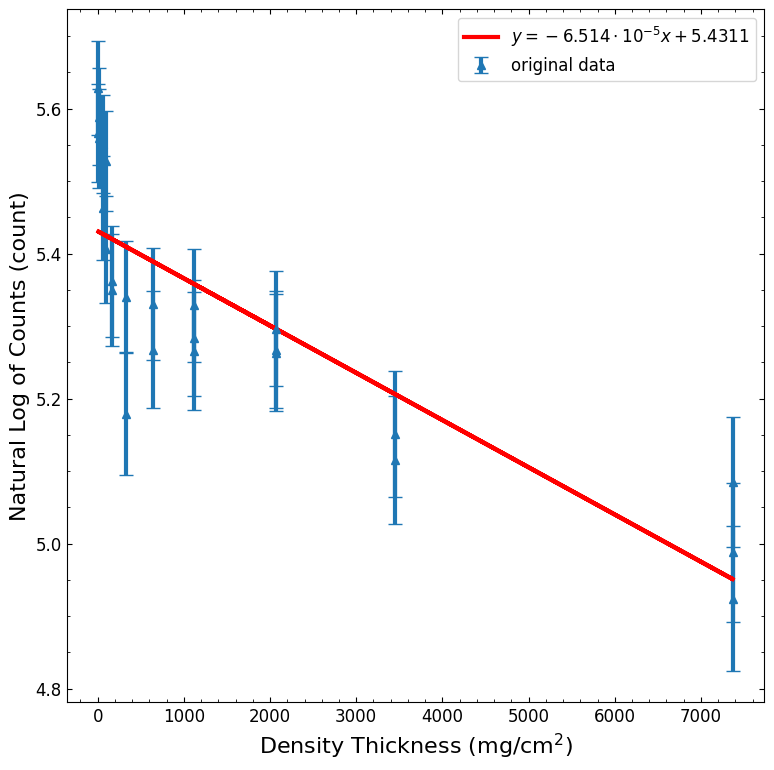

In [41]:
#plot the data
fig, ax=plt.subplots()
slr_1 = LinearRegression().fit(z.transpose().reshape(-1,1), lncts)
plt.errorbar(z, lncts, yerr= lncts_err, label="original data", linestyle='None', marker='^', capsize=5)
plt.plot(z, slr_1.predict(z.transpose().reshape(-1,1)),label="$y=-6.514\cdot10^{-5}x+5.4311$", color='red')
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("Natural Log of Counts (count)")
plt.savefig('CL_RA_1.jpg')

In [22]:
print(chi_squared_np(z, lncts, lncts_err, -6.514e-5, 5.4311))

47.33301850690779


In [36]:
#ordinary least squares regression of z>200mg/cm^2
z_02 =[]
lncts_02 =[]
lncts_err_02 =[]
for i in range(len(z)):
    if z[i] > 200:
        z_02.append(z[i])
        lncts_02.append(lncts[i])
        lncts_err_02.append(lncts_err[i])
z_02=np.array(z_02)
lncts_02=np.array(lncts_02)
lncts_err_02=np.array(lncts_err_02)
z_r_02 = sm.add_constant(z_02)
ols_02 = sm.OLS(lncts_02, z_r_02)
res_02 = ols_02.fit()
res_02.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     52.38
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.58e-06
Time:                        22:31:34   Log-Likelihood:                 22.141
No. Observations:                  15   AIC:                            -40.28
Df Residuals:                      13   BIC:                            -38.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3251      0.023    236.634      0.000       5.276       5.374
x1         -4.414e-05    6.1e-06     -7.237      0.000   -5.73e-05    -3.1e-05
==============================================================================
Omnibus:                        2.339   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.212
Skew:                          -0.696   Prob(JB):                        0.545
Kurtosis:                       2.992   Cond. No.                     5.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print(z_02)
print(lncts_02)

[ 328.  645. 1120. 2066. 3448. 7367.  328.  645. 1120. 2066. 1120. 2066.
 3448. 7367. 7367.]
[5.17953383 5.33078456 5.26579417 5.29631536 5.15097678 5.08512415
 5.34041854 5.26734256 5.32884657 5.26734256 5.28421844 5.26372592
 5.11559573 4.92435092 4.98825334]


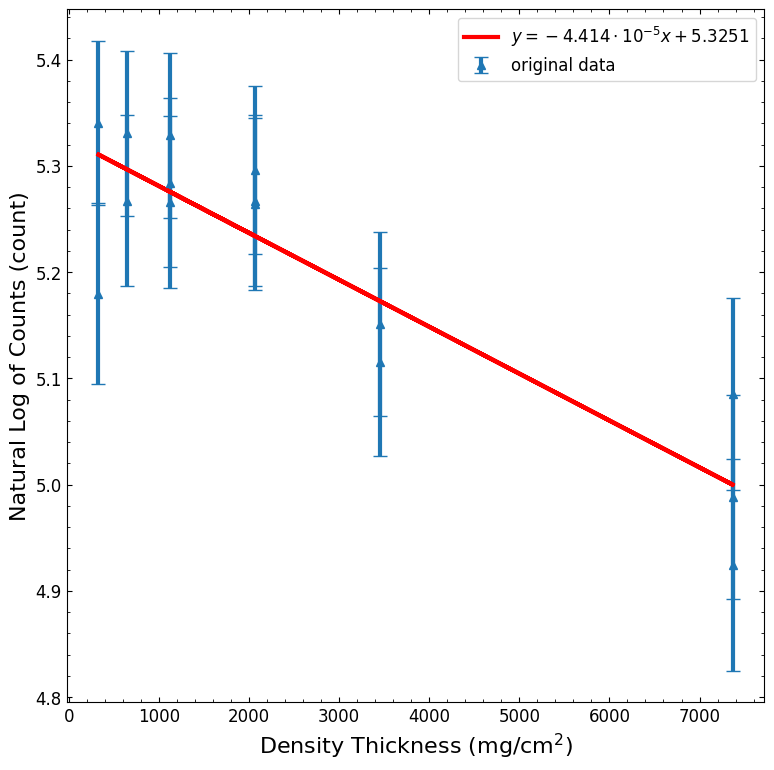

In [39]:
#plot the data
fig, ax=plt.subplots()
slr_2 = LinearRegression().fit(z_02.transpose().reshape(-1,1), lncts_02)
plt.errorbar(z_02, lncts_02, yerr= lncts_err_02, label="original data", linestyle='None', marker='^', capsize=5)
plt.plot(z_02, slr_2.predict(z_02.transpose().reshape(-1,1)),label="$y=-4.414\cdot10^{-5}x+5.3251$", color='red')
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("Natural Log of Counts (count)")
plt.savefig('CL_RA_2.jpg')

In [40]:
print(chi_squared_np(z_02, lncts_02, lncts_err_02, -4.414e-5, 5.3251))

6.233881529421939

In [42]:
#ordinary least squares regression of z>400mg/cm^2
z_04 =[]
lncts_04 =[]
lncts_err_04 =[]
for i in range(len(z)):
    if z[i] > 400:
        z_04.append(z[i])
        lncts_04.append(lncts[i])
        lncts_err_04.append(lncts_err[i])
z_04=np.array(z_04)
lncts_04=np.array(lncts_04)
lncts_err_04=np.array(lncts_err_04)
z_r_04 = sm.add_constant(z_04)
ols_04 = sm.OLS(lncts_04, z_r_04)
res_04 = ols_04.fit()
res_04.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     78.03
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.52e-06
Time:                        22:54:36   Log-Likelihood:                 21.931
No. Observations:                  13   AIC:                            -39.86
Df Residuals:                      11   BIC:                            -38.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3433      0.021    250.696      0.000       5.296       5.390
x1         -4.753e-05   5.38e-06     -8.833      0.000   -5.94e-05   -3.57e-05
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.563
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.321
Skew:                           0.240   Prob(JB):                        0.852
Kurtosis:                       2.398   Cond. No.                     6.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

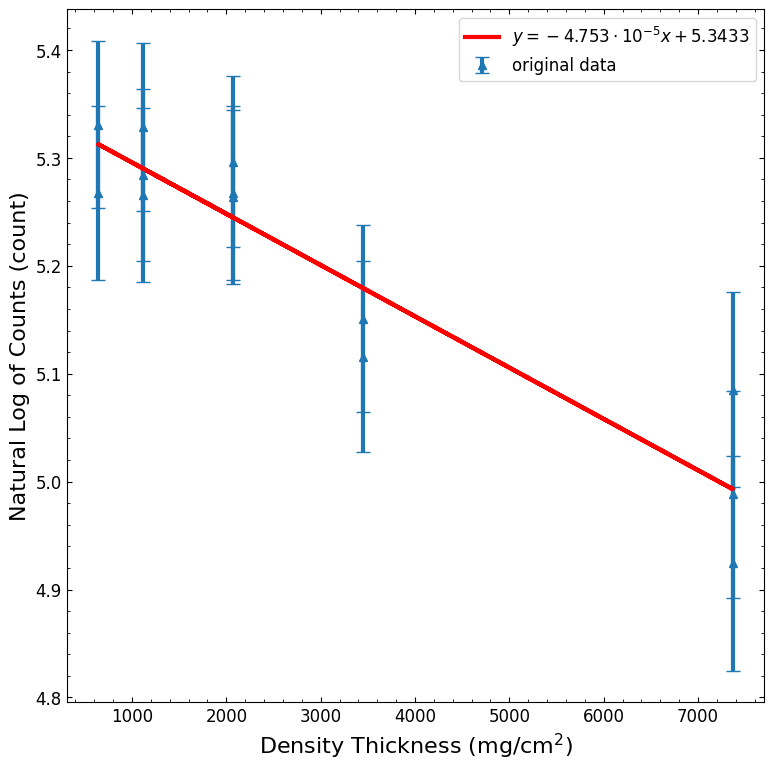

In [43]:
#plot the data
fig, ax=plt.subplots()
slr_3 = LinearRegression().fit(z_04.transpose().reshape(-1,1), lncts_04)
plt.errorbar(z_04, lncts_04, yerr= lncts_err_04, label="original data", linestyle='None', marker='^', capsize=5)
plt.plot(z_04, slr_3.predict(z_04.transpose().reshape(-1,1)),label="$y=-4.753\cdot10^{-5}x+5.3433$", color='red')
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("Natural Log of Counts (count)")
plt.savefig('CL_RA_3.jpg')

In [44]:
print(chi_squared_np(z_04, lncts_04, lncts_err_04, -4.753e-5, 5.3433))

3.406995882865653


In [45]:
#wavelength in mg/cm^2
print(1/4.753e-5)

21039.34357248054


In [52]:
#uncertainty 
print((5.38e-6)*1/4.753e-5)



0.1131916684199453
